In [2]:
# created a venv and installed - pandas, numpy, scikit_learn, matplotlib, seaborn, jupyter.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score



In [3]:
# Load the dataset for EDA.
data  = fetch_california_housing(as_frame = True)
df = pd.DataFrame(data.data)
pd.set_option('expand_frame_repr', False) # line of code tells pandas not to split wide DataFrames across multiple lines when printing.
df = pd.concat([data.data, data.target.rename('MedHouseVal1')], axis = 1)  # features and target of the dataset into a single DataFrame.
print(df.shape)
print(df.head()) 
print(df.info())
print(df.describe())

(20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal1
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23         4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22         3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24         3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25         3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25         3.422
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MedInc        20640 non-null  float64
 1   HouseAge      20640 non-null  float64
 2   AveRooms      20640 non-null  float64
 3   AveBedrms     20640 non-null  float64
 4   Population    20640 non-null  

array([[<Axes: title={'center': 'MedHouseVal1'}>]], dtype=object)

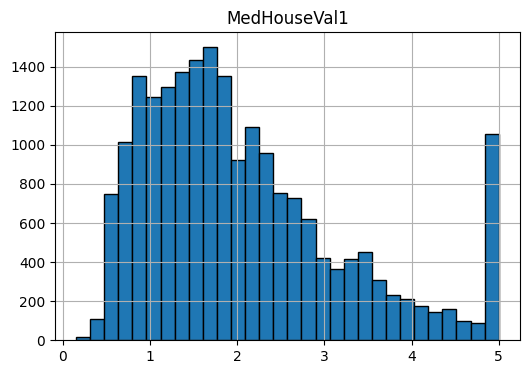

In [4]:

df.hist(column='MedHouseVal1', bins=30, figsize=(6, 4), color='#1f77b4', edgecolor='black')

<Axes: xlabel='Longitude', ylabel='Latitude'>

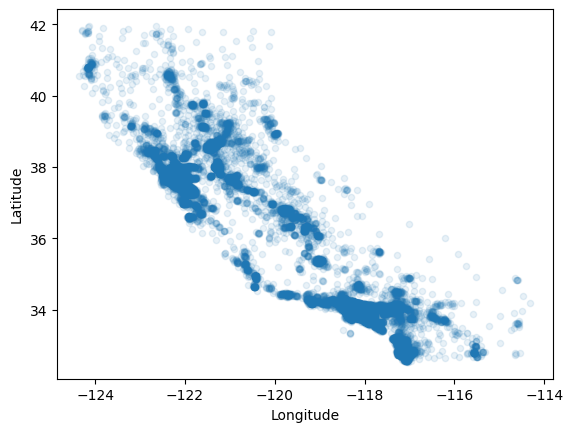

In [8]:
df.plot(kind = "scatter",x= "Longitude", y = "Latitude", alpha = 0.1)

In [ ]:
# Q1 = df.Longitude.quantile(0.25)
# Q2 = df.Longitude.quantile(0.50)
# Q3 = df.Longitude.quantile(0.75)
# print(Q1,Q2,Q3)

# IQR = Q3 - Q1
# print(IQR)

# lower_limit = Q1 - 1.5*IQR
# upper_limit = Q3 - 1.5*IQR
# print(lower_limit, upper_limit)

# df[(df.Longitude < lower_limit)|(df.Longitude >upper_limit)]

<Axes: >

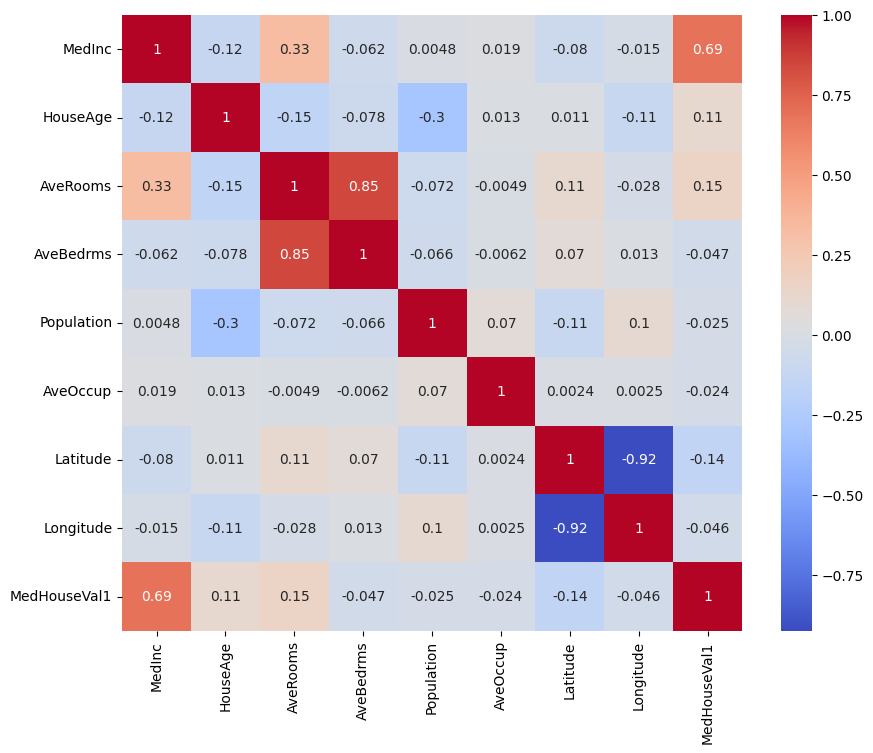

In [ ]:
# vizualizing the corelation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap = 'coolwarm' , annot=True)

In [ ]:

# finding the missing values in the dataset
print(df.isnull().sum())  # checking columnwise missing values 
df.isnull().values.any()  # checking if any missing values exists or not

MedInc          0
HouseAge        0
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
MedHouseVal1    0
dtype: int64


np.False_

In [ ]:
# spliting the data
X = df.drop('MedHouseVal1', axis=1)  # or X = df.drop(columns = 'MedHouseVal1')
y = df['MedHouseVal1']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
# metrics or evaluation of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE : {mae} MSE : {mse} RMSE : {rmse} R2 : {r2}")

MAE : 0.5332001304956555 MSE : 0.5558915986952442 RMSE : 0.7455813830127763 R2 : 0.575787706032451


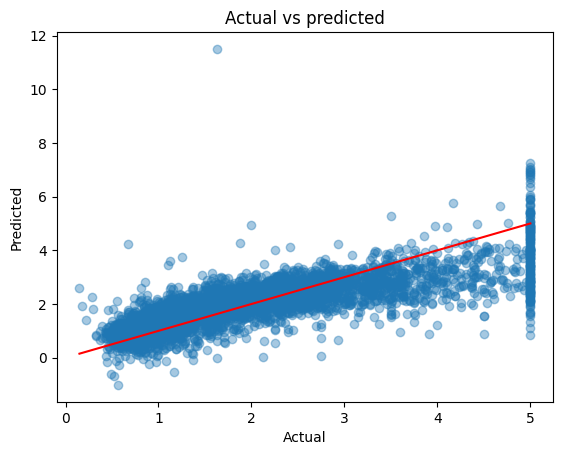

In [ ]:
    # plot 
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs predicted")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
    plt.show()

In [ ]:
import pickle

#saving the model to a file
with open('task1_ml_linear_regression.pkl','wb') as f:
    pickle.dump(model, f)

In [ ]:
# loading the saved Model
loaded_model = pickle.load(open('task1_ml_linear_regression.pkl', 'rb')) 

In [ ]:
input_data = (8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23)

# chaing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance.
input_data_reshaped = input_data_as_numpy_array.reshape(1,8)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('hosue is at good location')
else :
    print('house location is not goood')

[4.15194306]
house location is not goood


d:\Learnbay\Maincrafts Technologies\ML Internship files Task 1\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
